### Step 1: Importing the required libraries

Dataset and other files available on following link:
    
https://drive.google.com/drive/folders/1KCwEOqHnPWse4rDp7QkI6hCN4Jay91zM

In [1]:
# Importing the required libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.layers import *
from sklearn.model_selection import cross_val_score
import nltk
import pandas as pd
#nltk.download()
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pranav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

### Step 2: Load the dataset

The next step is to load the dataset from our machine and preprocess it. In the dataset, there are some rows that contain -‘No response’. This sentence is completely useless for us. So, we will drop such rows.

In [2]:
df=pd.read_csv('Datasets/isear.csv',header=None)
# The isear.csv contains rows with value 'No response'
# We need to remove such rows
df.drop(df[df[1] == '[ No response.]'].index, inplace = True)
print(df.head(10))
print(df.shape)

         0                                                  1
0      joy  [ On days when I feel close to my partner and ...
1     fear  Every time I imagine that someone I love or I ...
2    anger  When I had been obviously unjustly treated and...
3  sadness  When I think about the short time that we live...
4  disgust  At a gathering I found myself involuntarily si...
5    shame  When I realized that I was directing the feeli...
6    guilt  I feel guilty when when I realize that I consi...
7      joy  After my girlfriend had taken her exam we went...
8     fear  When, for the first time I realized the meanin...
9    anger  When a car is overtaking another and I am forc...
(7575, 2)


### Step 3:  Tokenization
    
Apply a word tokenizer to convert each sentence into a list of words. Example: If there is a sentence- ‘I am happy’. Afterward tokenizing it will get converted into a list [‘I’,’am’, ‘happy’].

In [3]:
feel_arr=df[1] #First column of df
#feel_arr
feel_arr[0] #first record in feel_arr

'[ On days when I feel close to my partner and other friends.  \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.]'

In [4]:
feel_arr = [word_tokenize(sent) for sent in feel_arr]

In [32]:
print(feel_arr[8])

['When', ',', 'for', 'the', 'first', 'time', 'I', 'realized', 'the', 'meaning', 'of', 'death', '.']


In [6]:
# The feel_arr will store all the sentences
# i.e feel_arr is the list of all sentences
#feel_arr=df[1]

# Each sentence in feel_arr is tokenized by the help of work tokenizer.
# If I have a sentence - 'I am happy'.
# After word tokenizing it will convert into- ['I','am','happy']
#feel_arr = [word_tokenize(sent) for sent in feel_arr]
#print(feel_arr[5]) #5th record in feel_arr

### Step 4: Padding

The length of each sentence is different. To pass it through the model, the length of each sentence should be equal. By visualizing the dataset, we can see that the length of the sentence in the dataset is not greater than 100 words. So, now we will convert every sentence to 100 words. For this, we will take the help of padding.

In [5]:
# Defined a function padd in which each sentence length
# is fixed to 100.
# If length is less than 100 , then
# the word- '<padd>' is append
def padd(arr):
    for i in range(100-len(arr)):
        arr.append('<pad>')
    return arr[:100]

# call the padd function for each sentence in feel_arr
for i in range(len(feel_arr)):
    feel_arr[i]=padd(feel_arr[i])

print(feel_arr[0]) #for the first record, rest of the places have been added with <padd> till 100 length

['[', 'On', 'days', 'when', 'I', 'feel', 'close', 'to', 'my', 'partner', 'and', 'other', 'friends', '.', 'When', 'I', 'feel', 'at', 'peace', 'with', 'myself', 'and', 'also', 'experience', 'a', 'close', 'contact', 'with', 'people', 'whom', 'I', 'regard', 'greatly', '.', ']', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


#### Step 5: Word embedding using the glove 
    
Now, each word needs to be embedded in some numeric representation, as the model understands only numeric digits. So, for this, we have downloaded a predefined glove vector of 50 dimensions from the internet. This vector is used for the purpose of word embedding. Each word is represented in a vector of 50 dimensions. 

The glove vector contains almost all words in the English dictionary.

The first word of each row is the character that is to be embedded. And from the column to the last column, there is the numeric representation of that character in a 50d vector form. 

Create embeddings_index dictionary of words and their corresponding index

In [6]:
vocab_f ='Datasets/glove.6B.50d.txt'

In [7]:
embeddings_index = {}
with open(vocab_f,encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# the embedding index of word 'happy'
embeddings_index['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

Map each word of our dataset for their corresponding embedding vector
Now, each word of the dataset should be embedded in 50 dimensions vector with the help of the dictionary form above.

In [8]:
embedded_feel_arr=[]
for each_sentence in feel_arr:
    embedded_feel_arr.append([])
    for word in each_sentence:
        if word.lower() in embeddings_index:
            embedded_feel_arr[-1].append(embeddings_index[word.lower()])
        else:
            embedded_feel_arr[-1].append([0]*50)


In [37]:
#print(embedded_feel_arr[0])

In [9]:
print(embedded_feel_arr[0][0])

[-0.61201   0.98226   0.11539   0.014623  0.23873  -0.067035  0.30632
 -0.64742  -0.38517  -0.03691   0.094788  0.57631  -0.091557 -0.54825
  0.25255  -0.14759   0.13023   0.21658  -0.30623   0.30028  -0.23471
 -0.17927   0.9518    0.54258   0.31172  -0.51038  -0.65223  -0.48858
  0.13486  -0.40132   2.493    -0.38777  -0.26456  -0.49414  -0.3871
 -0.20983   0.82941  -0.46253   0.39549   0.014881  0.79485  -0.79958
 -0.16243   0.013862 -0.53536   0.52536   0.019818 -0.16353   0.30649
  0.81745 ]


Here, in the above example, the dictionary formed i.e embeddings_index contains the word and its corresponding 50d vector, 

In [10]:
X=np.array(embedded_feel_arr)
print(np.shape(X)) #7575 total records, 100 words in each records i.e. 100 columns and every word has 50 embeded index values

(7575, 100, 50)


#### Step 6: One Hot encoding for the target variables and split train and test dataset

Now, we are done with all the preprocessing parts, and now we need to perform the following operations:

Do one-hot encoding of each emotion.
Split the dataset into train and test sets.

In [11]:
#Converting x into numpy-array
X=np.array(embedded_feel_arr)

# Perform one-hot encoding on df[0] i.e emotion
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(np.array(df[0]).reshape(-1,1)).toarray() #0th column of our original dataset df which carry emotions

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

####  Step 7: Build the model

In [12]:
#Also see below at the last the explanation of LSTM framework with diagram

class BiLSTMModel:
    def __init__(self):
        self.model = Sequential()                                       #first 100 is the number of hidden nodes
        self.model.add(Bidirectional(LSTM(100, input_shape=(100, 50)))) #https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e#:~:text=You%20always%20have%20to%20give%20a%20three-dimensional%20array,the%20input%20shape%20looks%20like%20%28batch_size%2C%20time_steps%2C%20units%29.
        self.model.add(Dropout(0.2))   #for node dropout rate in the hidden layers.      #Here, the dimension of input is 100 X 50 where 100 is the number of words in each input sentence of the dataset and 50 represents the mapping of each word in a 50d vector.
        self.model.add(Dense(7, activation='softmax')) #Output layer
        self.model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def fit(self, X, Y, epochs, batch_size):
        self.model.fit(X, Y, epochs=epochs, batch_size=batch_size)

    def evaluate(self, X, Y, batch_size):
        return self.model.evaluate(X, Y, batch_size=batch_size)

    def predict(self, X):
        return self.model.predict(X)


#### Step 8: Train the model

In [13]:
# create an instance of the BiLSTMModel class
model = BiLSTMModel()

# fit the model on the input and target data
model.fit(X_train,Y_train, epochs=5, batch_size=128) #128 decides 48 in the result i.e. batch size desides number of batches

Epoch 1/5
48/48 [==============================] - 19s 284ms/step - loss: 1.8602 - accuracy: 0.2528
Epoch 2/5
48/48 [==============================] - 14s 288ms/step - loss: 1.6810 - accuracy: 0.3550
Epoch 3/5
48/48 [==============================] - 14s 286ms/step - loss: 1.6290 - accuracy: 0.3733
Epoch 4/5
48/48 [==============================] - 14s 283ms/step - loss: 1.5505 - accuracy: 0.4097
Epoch 5/5
48/48 [==============================] - 13s 276ms/step - loss: 1.4991 - accuracy: 0.4304


#### Step 9: Model Summary

In [14]:
# print the summary of the model
model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 7)                 1407      
                                                                 
Total params: 122,207
Trainable params: 122,207
Non-trainable params: 0
_________________________________________________________________


This is the diagram of the proposed model :

Here, the dimension of input is 100 X 50 where 100 is the number of words in each input sentence of the dataset and 50 represents the mapping of each word in a 50d vector.

The output of Bidirectional(LSTM) is 200 because above we have defined the dimensionality of output space to be 100. As it is a BiLSTM model, so dimensionality will be 100*2 =200, as a BiLSTM contains two LSTM layers- one forward and the other backward.

After this dropout layer is added to prevent overfitting. And at last dense layer is applied to convert the 200 output sequences to 7, as we have only 7 emotions, so the output should be of seven dimensions only.

#### Step 10: Testing the model

In [15]:
#Testing the model
model.evaluate(X_test,Y_test, batch_size=10) #There are 1515 records in test set

152/152 [==============================] - 7s 24ms/step - loss: 1.5753 - accuracy: 0.3941


[1.5752731561660767, 0.394059419631958]

The accuracy of the model is ...

In [19]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(np.array(df[0]).reshape(-1,1)).toarray()

# Split into train and test
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Defining the BiLSTM Model
def model(X,Y,input_size1,input_size2,output_size):
  m=Sequential()
  m.add(Bidirectional(LSTM(100,input_shape=(input_size1,input_size2))))
  m.add(Dropout(0.5))
  m.add(Dense(output_size,activation='softmax'))
  m.compile('Adam','categorical_crossentropy',['accuracy'])
  m.fit(X,Y,epochs=15, batch_size=128)
  return m

In [17]:
bilstmModel=model(X_train,Y_train,100,50,7)

Epoch 1/15
48/48 [==============================] - 21s 319ms/step - loss: 1.9063 - accuracy: 0.2094
Epoch 2/15
48/48 [==============================] - 16s 335ms/step - loss: 1.7342 - accuracy: 0.3309
Epoch 3/15
48/48 [==============================] - 17s 343ms/step - loss: 1.6337 - accuracy: 0.3794
Epoch 4/15
48/48 [==============================] - 16s 323ms/step - loss: 1.5776 - accuracy: 0.3980
Epoch 5/15
48/48 [==============================] - 15s 307ms/step - loss: 1.5436 - accuracy: 0.4185
Epoch 6/15
48/48 [==============================] - 15s 307ms/step - loss: 1.4865 - accuracy: 0.4467
Epoch 7/15
48/48 [==============================] - 16s 323ms/step - loss: 1.4808 - accuracy: 0.4454
Epoch 8/15
48/48 [==============================] - 17s 355ms/step - loss: 1.4298 - accuracy: 0.4667
Epoch 9/15
48/48 [==============================] - 15s 315ms/step - loss: 1.3886 - accuracy: 0.4815
Epoch 10/15
48/48 [==============================] - 14s 280ms/step - loss: 1.3962 - accura

In [18]:
bilstmModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 200)              120800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1407      
                                                                 
Total params: 122,207
Trainable params: 122,207
Non-trainable params: 0
_________________________________________________________________


In [23]:
#from keras.utils.vis_utils import plot_model
#import pydot
#import graphviz
#plot_model(bilstmModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
bilstmModel.evaluate(X_test,Y_test)

48/48 [==============================] - 4s 47ms/step - loss: 1.4112 - accuracy: 0.4772


[1.4112303256988525, 0.47722771763801575]

The accuracy is 51%

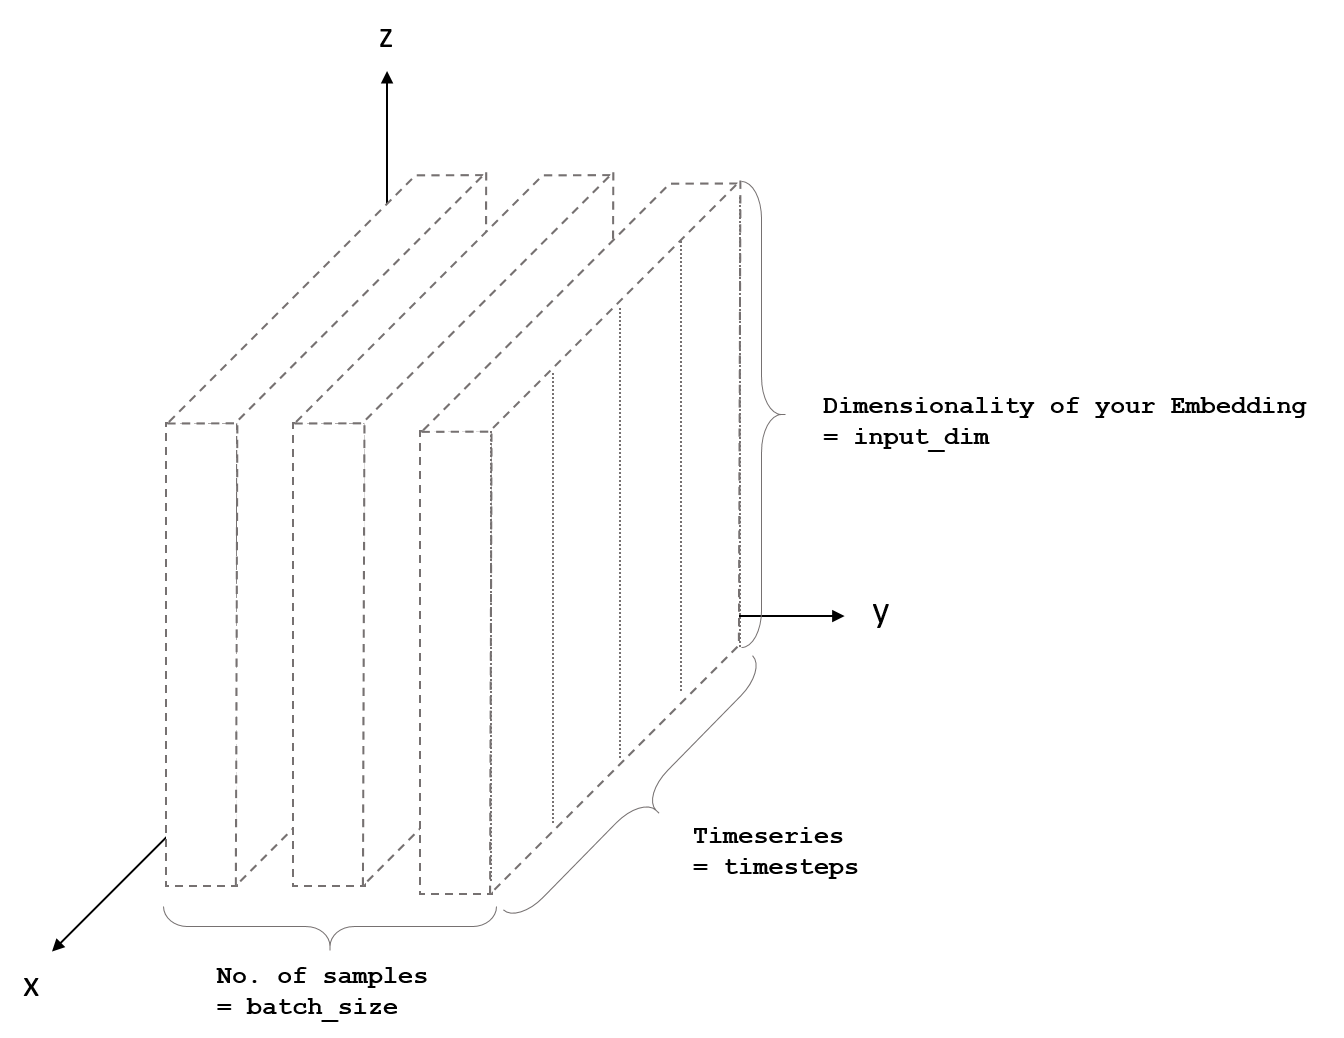

parameters in our example:

model.add(LSTM(hidden_nodes, input_shape=(timesteps, input_dim)))
model.add(Dropout(dropout_value))

hidden_nodes = This is the number of neurons of the LSTM. If you have a higher number, the network gets more powerful. Howevery, the number of parameters to learn also rises. This means it needs more time to train the network.

timesteps = the number of timesteps you want to consider. E.g. if you want to classify a sentence, this would be the number of words in a sentence.

input_dim = the dimensions of your features/embeddings. E.g. a vector representation of the words in the sentence

dropout_value = To reduce overfitting, the dropout layer just randomly takes a portion of the possible network connections. This value is the percentage of the considered network connections per epoch/batch.